==== Fourier 계수 V_G 비교 (Magnitude, eV) ====
Square Well (Trapz):   0.063662 eV
Square Well (Simpson): 0.063662 eV
Cosine Potential:       0.050000 eV


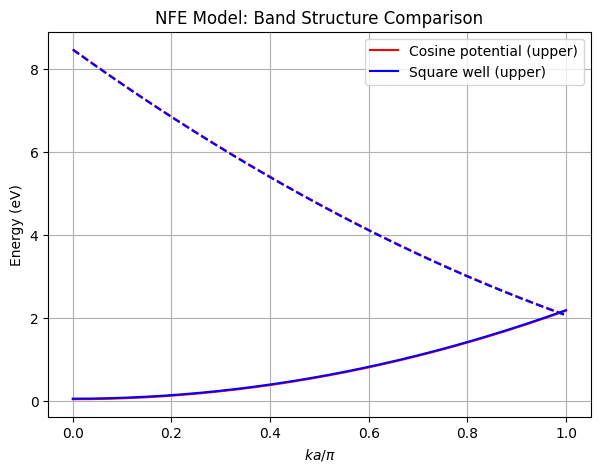

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

# -------------------------------
# 1. 물리적 가정
# -------------------------------
a = 4.2e-10  # 격자 상수 (Na 기준, m)
V0 = 0.1     # 퍼텐셜 진폭 (eV)
hbar = 1.054e-34  # J·s
m = 9.11e-31      # kg
eV = 1.602e-19    # J

# -------------------------------
# 2. 퍼텐셜 정의
# -------------------------------
def V_cos(x):      # 코사인 파형
    return V0 * np.cos(2*np.pi*x/a)

def V_square(x):   # 구형 퍼텐셜 (폭 = a/2)
    return np.where(np.abs(x) < a/4, -V0, V0)

# -------------------------------
# 3. VG 계산 (수치적)
# -------------------------------
def VG_numeric(Vfunc, G, Nx=1000, method='trapz'):
    x = np.linspace(-a/2, a/2, Nx)
    integrand = Vfunc(x) * np.exp(-1j*G*x)
    if method == 'trapz':
        val = np.trapz(integrand, x)
    elif method == 'simpson':
        val = simpson(integrand, x)
    return val / a

# Reciprocal lattice 벡터
G = 2*np.pi/a

# 두 가지 방법 비교
VG_square_trap = VG_numeric(V_square, G, method='trapz')
VG_square_simp = VG_numeric(V_square, G, method='simpson')
VG_cos_analytic = V0/2  # 코사인 퍼텐셜의 분석적 결과

print("==== Fourier 계수 V_G 비교 (Magnitude, eV) ====")
print(f"Square Well (Trapz):   {abs(VG_square_trap):.6f} eV")
print(f"Square Well (Simpson): {abs(VG_square_simp):.6f} eV")
print(f"Cosine Potential:       {VG_cos_analytic:.6f} eV")

# -------------------------------
# 4. NFE 모델의 에너지 밴드 계산
# -------------------------------
def energy_NFE(k, VG):
    E0 = (hbar**2 * k**2) / (2*m) / eV  # eV 단위
    Egap = 2 * abs(VG)                  # 밴드갭 (eV)
    return E0, Egap

k_vals = np.linspace(0, np.pi/a, 300)
E_free = (hbar**2 * k_vals**2)/(2*m)/eV

# Brillouin zone 경계 근처에서 밴드 분할
VG_cos = VG_cos_analytic
VG_sq = abs(VG_square_simp)
E_cos_upper = (hbar**2*(G/2 + (k_vals - G/2))**2)/(2*m)/eV + VG_cos
E_cos_lower = (hbar**2*(G/2 - (k_vals - G/2))**2)/(2*m)/eV - VG_cos
E_sq_upper = (hbar**2*(G/2 + (k_vals - G/2))**2)/(2*m)/eV + VG_sq
E_sq_lower = (hbar**2*(G/2 - (k_vals - G/2))**2)/(2*m)/eV - VG_sq

# -------------------------------
# 5. 시각화
# -------------------------------
plt.figure(figsize=(7,5))
plt.plot(k_vals*a/np.pi, E_cos_upper, 'r', label='Cosine potential (upper)')
plt.plot(k_vals*a/np.pi, E_cos_lower, 'r--')
plt.plot(k_vals*a/np.pi, E_sq_upper, 'b', label='Square well (upper)')
plt.plot(k_vals*a/np.pi, E_sq_lower, 'b--')
plt.xlabel(r"$ka/\pi$")
plt.ylabel("Energy (eV)")
plt.title("NFE Model: Band Structure Comparison")
plt.legend()
plt.grid(True)
plt.show()